In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/dramicos/Breast-Cancer-Detection/main/Resources/data.csv'

In [3]:
df = pd.read_csv(url)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Choose a cutoff value and create a list of diagnosis to be replaced
# use the variable name `diagnosis_to_replace`

# Transform diagnosis
def diagnosis_to_replace(diagnosis):
    if diagnosis == "M":
        return 1
    else:
        return 0
    

df["diagnosis"] = df["diagnosis"].apply(diagnosis_to_replace)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Split our preprocessed data into our features and target arrays also drop the id as that is not useful
X = df.drop(["diagnosis", "id"], axis='columns')
y = df["diagnosis"]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


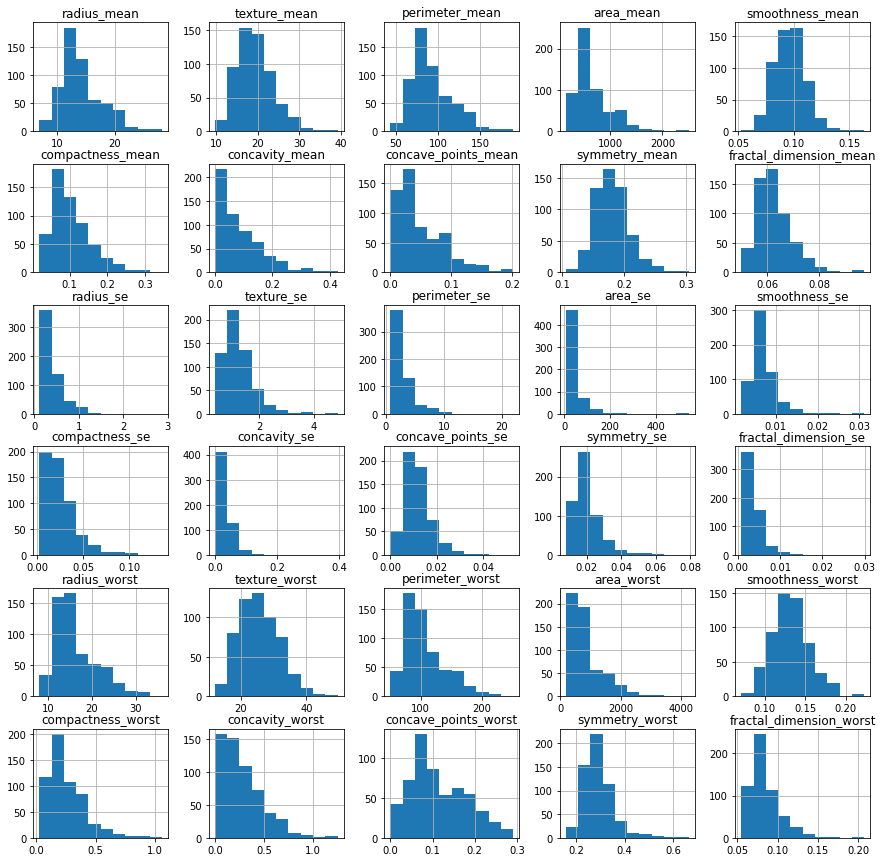

In [111]:
X.hist(figsize=(15,15))
plt.show()

In [6]:
benign = df.loc[df['diagnosis']==0]
benign.drop(columns=['id','diagnosis'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [7]:
benign.shape

(357, 30)

In [8]:
malign = df.loc[df['diagnosis']==1]
malign.drop(columns=['id','diagnosis'], inplace=True)

In [9]:
malign.shape

(212, 30)

In [10]:
balanced_df = df.drop(   df.loc[df['diagnosis'] == 0].sample(n=(benign.shape[0] - malign.shape[0])).index ).reset_index(drop=True)

In [11]:
balanced_df.shape

(424, 32)

In [12]:
balanced_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
420,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
421,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
422,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
balanced_df.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


In [15]:
b_X = balanced_df.drop(["diagnosis", "id"], axis='columns')
b_y = balanced_df['diagnosis']

In [14]:
# compare the 2 datasets balanced and normal
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [41]:
b_X_train, b_X_test, b_y_train, b_y_test = train_test_split(b_X, b_y, random_state=2, stratify=b_y, test_size=0.31)

In [42]:
# Create a MinMaxScaler instance since all values are positive to try for better results
scaler = MinMaxScaler()

# Fit the MinMaxScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Fit the MinMaxScaler for balanced
b_X_scaler = scaler.fit(b_X_train)

# Scale the data
b_X_train_scaled = b_X_scaler.transform(b_X_train)
b_X_test_scaled = b_X_scaler.transform(b_X_test)

In [44]:
#  Trial one: Logistic Regression Algorithm raw
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state = 78, max_iter=10000)
lr.fit(X_train, y_train)

print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")

Training Data Score: 0.9624413145539906
Testing Data Score: 0.9300699300699301


In [45]:
#  Trial two: Logistic Regression Algorithm balanced
from sklearn.linear_model import LogisticRegression

b_lr = LogisticRegression(random_state = 78, max_iter=10000)
b_lr.fit(b_X_train, b_y_train)

print(f"Training Data Score: {lr.score(b_X_train, b_y_train)}")
print(f"Testing Data Score: {lr.score(b_X_test, b_y_test)}")

Training Data Score: 0.9452054794520548
Testing Data Score: 0.9621212121212122


In [46]:
#  Trial two: Random Forest Classifier raw
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=78, n_estimators=250).fit(X_train_scaled, y_train)

print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.9440559440559441


In [47]:
#  Trial two: Random Forest Classifier raw
from sklearn.ensemble import RandomForestClassifier

b_rfc = RandomForestClassifier(random_state=78, n_estimators=100).fit(b_X_train_scaled, b_y_train)

print(f'Training Score: {rfc.score(b_X_train_scaled, b_y_train)}')
print(f'Testing Score: {rfc.score(b_X_test_scaled, b_y_test)}')

Training Score: 0.9794520547945206
Testing Score: 0.9772727272727273


In [48]:
y_pred = rfc.predict(X_test_scaled)

In [49]:
b_y_pred = rfc.predict(b_X_test_scaled)

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[89,  1],
       [ 7, 46]])

In [53]:
b_cm = confusion_matrix(b_y_test, b_y_pred)
b_cm

array([[66,  0],
       [ 3, 63]])

In [54]:
btn, bfp, bfn, btp = confusion_matrix(b_y_test, b_y_pred).ravel()

In [55]:
bad = bfn/(btn + bfp + bfn + btn)
print(bad)

0.022222222222222223


In [56]:
threshold = 0.5

In [57]:
pred_proba = b_rfc.predict_proba(b_X_test)
predicted = (pred_proba [:,1] >= threshold).astype('int')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy = accuracy_score(b_y_test, predicted)
print(round(accuracy,4)*100, "%")

50.0 %


In [61]:
# We decided to drop a few more benign rows to bias toward malignant

nb_df = df.drop(   df.loc[df['diagnosis'] == 0].sample(n=(benign.shape[0] - malign.shape[0]+50)).index ).reset_index(drop=True)

In [62]:
nb_df.shape

(374, 32)

In [63]:
nb_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
nb_X = balanced_df.drop(["diagnosis", "id"], axis='columns')
nb_y = balanced_df['diagnosis']

In [95]:
# We tried varying the test size and got the best results at 31% test size
nb_X_train, nb_X_test, nb_y_train, nb_y_test = train_test_split(nb_X, nb_y, random_state=74, stratify=nb_y, test_size=0.31)

In [96]:
nb_X_scaler = scaler.fit(nb_X_train)

# Scale the data
nb_X_train_scaled = nb_X_scaler.transform(nb_X_train)
nb_X_test_scaled = nb_X_scaler.transform(nb_X_test)

In [97]:
nb_rfc = RandomForestClassifier(random_state=78, n_estimators=100).fit(nb_X_train_scaled, nb_y_train)

print(f'Training Score: {rfc.score(nb_X_train_scaled, nb_y_train)}')
print(f'Testing Score: {rfc.score(nb_X_test_scaled, nb_y_test)}')

Training Score: 0.9657534246575342
Testing Score: 0.9848484848484849


In [98]:
nb_y_pred = rfc.predict(nb_X_test_scaled)

In [94]:
nb_cm = confusion_matrix(nb_y_test, nb_y_pred)
nb_cm

array([[60,  0],
       [ 2, 57]])

In [108]:
btn, bfp, bfn, btp = confusion_matrix(nb_y_test, nb_y_pred).ravel()

In [109]:
bad = bfn/(btn + bfp + bfn + btn)
print(bad)

0.007575757575757576


In [81]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [82]:
tsne = TSNE(learning_rate=35)

In [83]:
tsne_features = tsne.fit_transform(nb_X_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [99]:
tsne_features.shape

(318, 2)

In [100]:
pca = PCA(n_components=10)

In [103]:
df_pca = pca.fit_transform(nb_X_train_scaled)

In [104]:
df_pca = pd.DataFrame(
    data=df_pca, columns=["pc 1", "pc 2","pc 3","pc 4","pc 5","pc 6","pc 7","pc 8","pc 9","pc 10"])
df_pca.head()

,pc 1,pc 2,pc 3,pc 4,pc 5,pc 6,pc 7,pc 8,pc 9,pc 10
0,-0.485864,-0.207422,-0.152592,-0.229274,0.001172,-0.008967,0.053739,-0.045657,0.019417,-0.046200
1,-0.474761,-0.113661,0.062613,0.115171,0.037650,0.336346,0.044547,-0.044658,-0.030575,-0.041961
2,0.315104,-0.381413,-0.148181,0.061313,0.015732,-0.078397,0.011753,0.061279,0.028666,0.038775
3,0.460149,0.306105,-0.387616,-0.168119,0.043851,0.184326,0.172169,-0.004463,-0.047660,-0.014475
4,-0.480622,-0.242772,-0.070704,-0.087481,-0.101959,-0.011677,-0.034322,0.068668,0.052954,0.024131


In [105]:
pca.explained_variance_ratio_

array([0.5267954 , 0.18847594, 0.06957724, 0.05472783, 0.0374226 ,
       0.03152325, 0.01826076, 0.01256775, 0.00984264, 0.00904746])

In [106]:
sum = 0

for i in pca.explained_variance_ratio_:
  sum += i

In [107]:
print(sum)

0.9582408789431046
